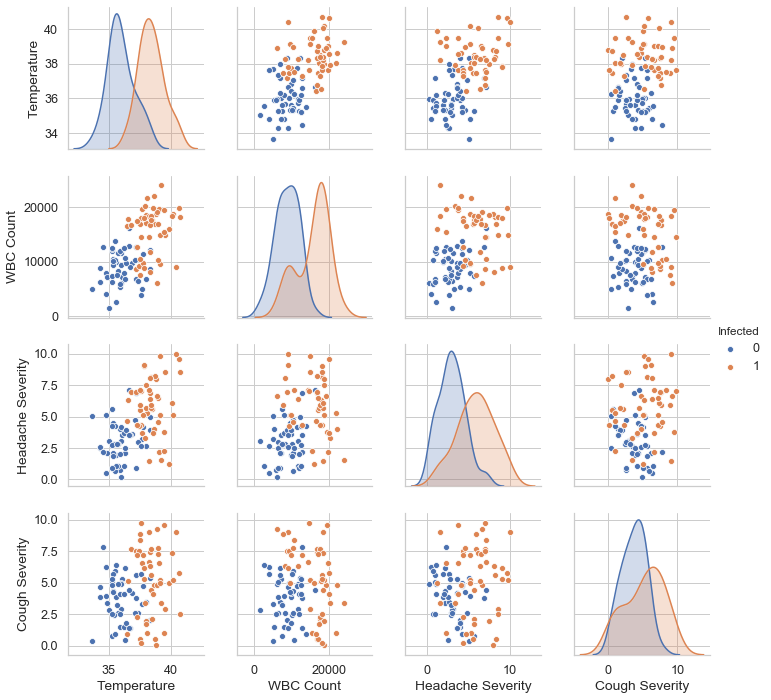

In [4]:
#the code in the next below describes a classification tree to classify patients based on the patient characteristics
# importing packages
import pandas as pd #imports the pandas package for working with the datasets
import matplotlib.pyplot as plt #imports this package for plotting graphs
import matplotlib #imports matplotlib for graphs and figures
import seaborn as sns 
sns.set(color_codes=True, font_scale = 1.15) 
sns.set_style("whitegrid")

#imports model for splitting the arrays into random train and test subsets
from sklearn.model_selection import train_test_split 

#imports a machine learning model for classifying the tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz 

# loading data as a pandas dataframe
df = pd.read_csv('CS51_Assignment_Diagnosis_Data.csv')
#plots the relationship between the variables
sns.pairplot(df, hue='Infected',vars=['Temperature', 'WBC Count','Headache Severity', 'Cough Severity']);

In [5]:
#the code below defines features of the classification tree which we can manipulate to increase accuracy
#through trial and error, Cough severity is not required in our model.
all_inputs = df[['Temperature', 'WBC Count','Headache Severity']].values

#the code below defines the class of the decision tree which is what we are trying to classify
all_classes = df['Infected'].values

# split data into training and testing arrays. The training size is 70% and testing size is 30%
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes,
train_size=0.7, test_size=0.3, random_state=1)

'''The code below calls the method for building the tree and assigns it the variable dtc. Using
trial and error, a maximum depth of 3 produced the best results'''
dtc = DecisionTreeClassifier(max_depth=3)

'''The code below builds the decision tree based on the training data '''
dtc.fit(train_inputs, train_classes)
'''This prints the training accuracy and the testing accuracy based on th split of the data'''
print("Training Accuracy:",round(dtc.score(train_inputs, train_classes),4))
print("Test Accuracy:",round(dtc.score(test_inputs, test_classes),4))

Training Accuracy: 0.9857
Test Accuracy: 0.9667


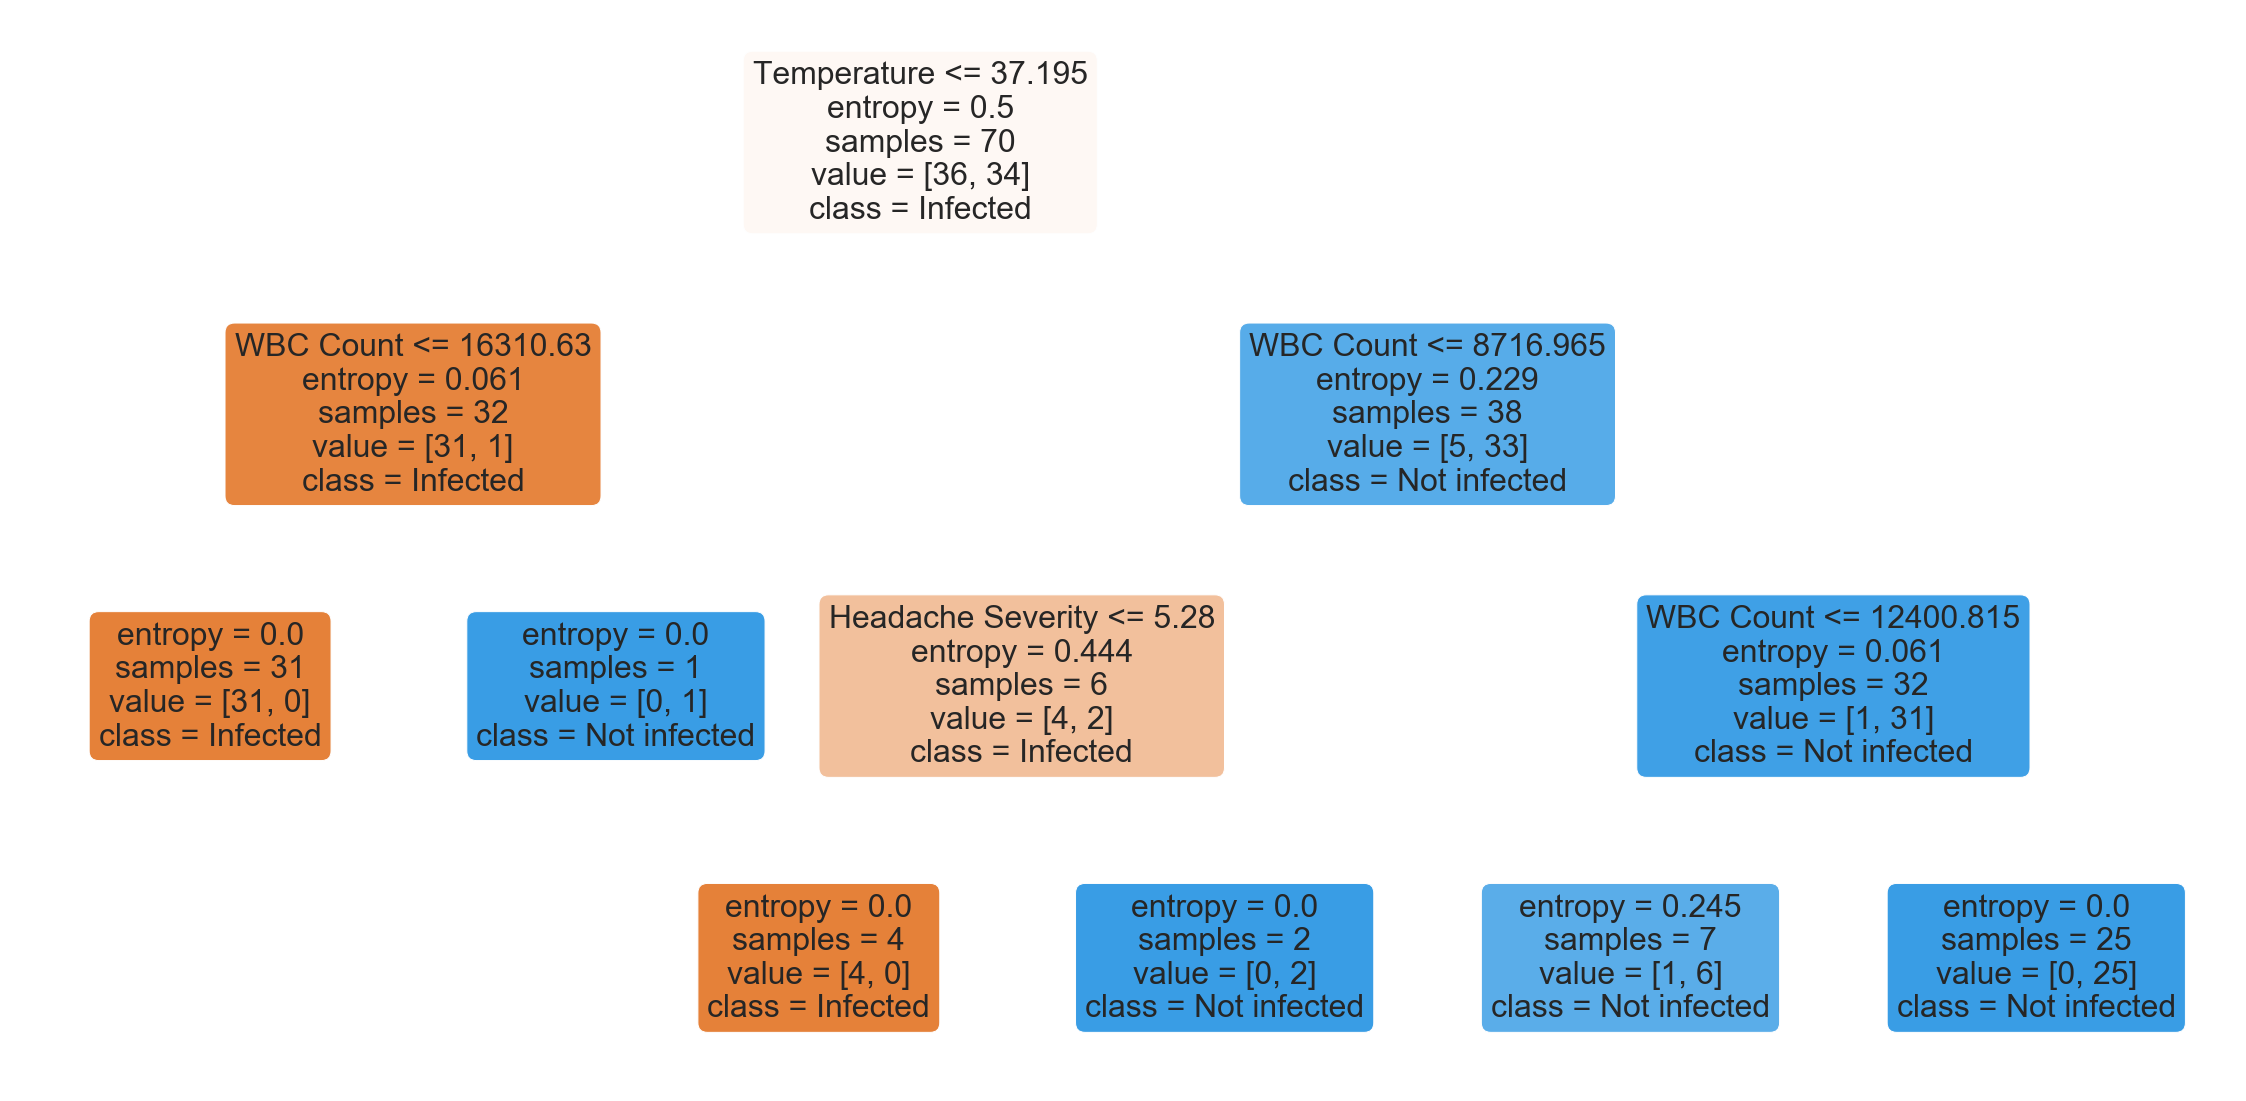

In [7]:
#the code below shows the visualization of the decision tree
'''The code below sets the labels for the features and the classes to be used in the decision tree based
on the classification'''
features = ['Temperature', 'WBC Count','Headache Severity', 'Cough Severity']
classes = ['Infected', 'Not infected']

from sklearn import tree #imports decision tree module
plt.figure(figsize=(40,20))  #sets the length and width of the decision tree

'''The code below is inspired by sklearn website and plots the decision tree based on the parameters given
to plot_tree which is a method under the decision tree module.'''
plot = tree.plot_tree(dtc.fit(train_inputs, train_classes), label = 'all', filled = True,
                      feature_names=names, class_names = classes, rounded = True)
plt.show()

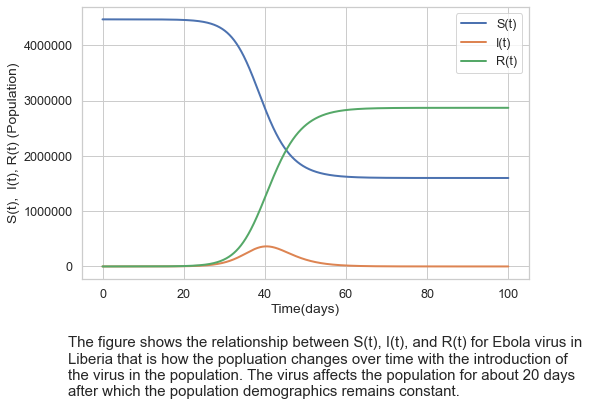

In [10]:
#the code below simulates an SIR model for Ebola
import numpy as np

t0 = 0 #sets the initial value of time which is zero days
t_end = 100 #sets the final value of time which is 100 days to determine when the simulation will end

'''The codee below sets the step-size that is the intervals between the start and end time.
We use 0.001 because it is more accurate than 0.01. For this case, there is no difference between 0.001
and 0.0001 etc '''
h = .001 

'''The number of steps is determined by taking the total time and diving it by the intervals that is the
step-size'''
steps = int((t_end - t0)/h + 1) 

'''To store the time values, we set the range with the start being the initial value of t, the end being
the final value and the interval being the steps. This returns evenly spaced time values over the interval
given by steps. We store the number of susceptible, infected and removed based on the steps that we will
take. '''
t = np.linspace(t0, t_end, steps) # storing t values
S = np.zeros(steps) # for storing S values
I = np.zeros(steps) # for storing I values
R = np.zeros(steps) #for storing R values

'''The code below sets the initial values for susceptible, infected and removed. The information is based
on CDC reports and the citation provided by Minerva. We also set the value for the total population N which
is the sum of infected and susceptible.'''
S[0] = 4472380
I[0] = 10
R[0] = 0
N = S[0] + I[0]

'''The code below sets the constant b and k which give us the infection and recovery rate respectively. 
The value of b is divided by N since the value from the citation used was B/N.'''
b = 0.8/N # 
k = 0.5   # 

'''The code below defines a function that determines the relationship between the susceptible and infected
people as a function time. b is negative because S and I are inversely proportional that is as the number
of infected people increase, the number of susceptible decreases as they get infected.'''
def dSdt(t,S,I,):
    # dS/dt
    return -b * S* I

'''The code below describes a function that determines the relationship between the infected and 
susceptible as afunction of time with the the recovery rate in consideration. That is in this case,
the number of infected will decrease if more people recover even as susceptible people become infected.'''
def dIdt(t,S,I,):
    # dI/dt
    return (b * S  - k)* I

'''The code below describes a function that determines the number of infected people who recover as a 
function time.'''
def dRdt(t, I,):
    #dR/dt
    return k * I

'''The code below is a for loop that shows the increase of the number of infected, susceptible and removed
people as a function of time based on the step-size. It is an application of Euler\'s method as it will 
generate a range of possible solutions to the functions. The next step (point in the graph) is determined
by the slope of the tangent to the previous point and is an approximation of the actual solution.'''
for n in range(0, steps-1): # range(start, stop, step)
    S[n+1] = S[n] + h * dSdt(t[n], S[n], I[n])
    I[n+1] = I[n] + h * dIdt(t[n], S[n], I[n])
    R[n+1] = R[n] + h * dRdt(t[n], I[n])

import matplotlib.pyplot as plt #imports library for plotting the graph of possible solutions
%matplotlib inline
plt.rcParams.update({'font.size': 15}) #sets the font-size of the graph
plt.rcParams["figure.figsize"] = [8,5] #sets the length and with of the graph
plt.plot(t,S,linewidth=2,label='S(t)') #plots the approximate solution for number of susceptible
plt.plot(t,I,linewidth=2,label='I(t)') #plots the approximate solution for number of infected
plt.plot(t,R,linewidth=2,label='R(t)') #plots the approximate soluion for number of removed
plt.xlabel('Time(days)') #sets the x-axis label
plt.ylabel('S(t),  I(t), R(t) (Population)') #sets the y-axis label
text = ('The figure shows the relationship between S(t), I(t), and R(t) for Ebola virus in\nLiberia' 
        ' that is how the popluation changes over time with the introduction of\nthe virus in the' 
        ' population. The virus affects the population for about 20 days\nafter which the population'
        ' demographics remains constant.')
plt.figtext(0.1, -0.2, text) #inserts the figure caption
plt.legend(loc='upper right') #sets the location for the figure legend
plt.show() #displays our plot.